### 1. Importacion de Librerias y Carga de Datos

In [60]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

# Cargar datos
datos_entrenamiento = pd.read_csv("../../data/data/application_train.csv")
print(f"Datos: {datos_entrenamiento.shape} | Fraude: {datos_entrenamiento['TARGET'].mean()*100:.1f}%")
datos_entrenamiento.head()

Datos: (307511, 122) | Fraude: 8.1%


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Preprocesamiento de Datos

In [61]:
# Seleccionar SOLO variables numericas (sin categoricas)
datos_numericos = datos_entrenamiento.select_dtypes(include=[np.number])
print(f"Variables numericas: {datos_numericos.shape[1]}")
print("Trabajando UNICAMENTE con variables numericas")

Variables numericas: 106
Trabajando UNICAMENTE con variables numericas


In [62]:
# Renombrar columnas numericas a español
nombres_espanol = {
    'TARGET': 'objetivo',
    'CNT_CHILDREN': 'num_hijos',
    'CNT_FAM_MEMBERS': 'num_miembros_familia',
    'AMT_INCOME_TOTAL': 'ingreso_total',
    'AMT_CREDIT': 'monto_credito',
    'AMT_ANNUITY': 'anualidad',
    'AMT_GOODS_PRICE': 'precio_bienes',
    'DAYS_BIRTH': 'edad_dias',
    'DAYS_EMPLOYED': 'dias_empleado',
    'DAYS_REGISTRATION': 'dias_registro',
    'DAYS_ID_PUBLISH': 'dias_publicacion_id',
    'OWN_CAR_AGE': 'edad_auto',
    'EXT_SOURCE_1': 'score_externo_1',
    'EXT_SOURCE_2': 'score_externo_2',
    'EXT_SOURCE_3': 'score_externo_3',
    'REGION_POPULATION_RELATIVE': 'poblacion_region',
    'REGION_RATING_CLIENT': 'calificacion_region',
    'REGION_RATING_CLIENT_W_CITY': 'calificacion_region_ciudad',
    'FLAG_MOBIL': 'tiene_movil',
    'FLAG_EMP_PHONE': 'tiene_telefono_trabajo',
    'FLAG_WORK_PHONE': 'tiene_telefono_laboral',
    'FLAG_CONT_MOBILE': 'movil_contactable',
    'FLAG_PHONE': 'tiene_telefono',
    'FLAG_EMAIL': 'tiene_email',
    'HOUR_APPR_PROCESS_START': 'hora_solicitud',
    'OBS_30_CNT_SOCIAL_CIRCLE': 'obs_30dias_circulo_social',
    'DEF_30_CNT_SOCIAL_CIRCLE': 'def_30dias_circulo_social',
    'OBS_60_CNT_SOCIAL_CIRCLE': 'obs_60dias_circulo_social',
    'DEF_60_CNT_SOCIAL_CIRCLE': 'def_60dias_circulo_social',
    'DAYS_LAST_PHONE_CHANGE': 'dias_ultimo_cambio_telefono',
    'AMT_REQ_CREDIT_BUREAU_HOUR': 'consultas_buro_ultima_hora',
    'AMT_REQ_CREDIT_BUREAU_DAY': 'consultas_buro_ultimo_dia',
    'AMT_REQ_CREDIT_BUREAU_WEEK': 'consultas_buro_ultima_semana',
    'AMT_REQ_CREDIT_BUREAU_MON': 'consultas_buro_ultimo_mes',
    'AMT_REQ_CREDIT_BUREAU_QRT': 'consultas_buro_ultimo_trimestre',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 'consultas_buro_ultimo_ano'
}

# Solo renombrar las columnas que existen en los datos numericos
nombres_numericos = {k: v for k, v in nombres_espanol.items() if k in datos_numericos.columns}
datos_numericos = datos_numericos.rename(columns=nombres_numericos)
print(f"Columnas renombradas: {len(nombres_numericos)}")

Columnas renombradas: 36


In [63]:
# Imputar valores faltantes con la mediana
datos_numericos = datos_numericos.fillna(datos_numericos.median())
print(f"Nulos imputados con mediana. Dataset final: {datos_numericos.shape}")

Nulos imputados con mediana. Dataset final: (307511, 106)


In [64]:
# Verificar que no hay nulos
print(f"Valores nulos restantes: {datos_numericos.isnull().sum().sum()}")
print(f"Variables numericas finales: {datos_numericos.shape[1]}")
datos_numericos.head()

Valores nulos restantes: 0
Variables numericas finales: 106


,SK_ID_CURR,objetivo,num_hijos,ingreso_total,monto_credito,anualidad,precio_bienes,poblacion_region,edad_dias,dias_empleado,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,consultas_buro_ultima_hora,consultas_buro_ultimo_dia,consultas_buro_ultima_semana,consultas_buro_ultimo_mes,consultas_buro_ultimo_trimestre,consultas_buro_ultimo_ano
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Separar X e y
X = datos_numericos.drop('objetivo', axis=1)
y = datos_numericos['objetivo']
print(f"Datos: {X.shape[0]} muestras, {X.shape[1]} caracteristicas numericas")
print(f"Fraude: {y.mean()*100:.1f}%")

Datos: 307511 muestras, 105 caracteristicas numericas
Fraude: 8.1%


In [66]:
# Dividir en etiquetados 10% y no etiquetados 90%
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
    X, y, train_size=0.1, stratify=y, random_state=42
)
y_unlabeled_masked = np.full(len(y_unlabeled), -1)

print(f"Etiquetados: {X_labeled.shape[0]} (10%) | No etiquetados: {X_unlabeled.shape[0]} (90%)")

Etiquetados: 30751 (10%) | No etiquetados: 276760 (90%)


In [67]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_labeled, y_labeled, test_size=0.2, stratify=y_labeled, random_state=42
)
print(f"Entrenamiento: {X_train.shape[0]} | Prueba: {X_test.shape[0]}")

Entrenamiento: 24600 | Prueba: 6151


In [68]:
# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_unlabeled_scaled = scaler.transform(X_unlabeled)
print("Datos normalizados con StandardScaler")

Datos normalizados con StandardScaler


### 4. Entrenamiento Inicial

In [69]:
# PASO 1: M ← entrenar_modelo_base(D_labeled)
modelo_base = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
modelo_base.fit(X_train_scaled, y_train)

y_pred_base = modelo_base.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)
auc_base = roc_auc_score(y_test, modelo_base.predict_proba(X_test_scaled)[:, 1])

print(f"ENTRENAMIENTO INICIAL (solo etiquetados) | Accuracy: {acc_base:.4f} | F1: {f1_base:.4f} | AUC: {auc_base:.4f}")

ENTRENAMIENTO INICIAL (solo etiquetados) | Accuracy: 0.6809 | F1: 0.2400 | AUC: 0.7133


### 5. Método Semisupervisado: Self-Training

In [70]:
# PASO 1: Inicialización
# M ← entrenar_modelo_base(D_labeled) - ya entrenado arriba
# D_temp ← D_labeled
# D_remaining ← D_unlabeled

D_temp_X = X_train_scaled.copy()
D_temp_y = y_train.copy()
D_remaining_X = X_unlabeled_scaled.copy()
D_remaining_indices = np.arange(len(X_unlabeled_scaled))

threshold = 0.7
max_iterations = 10

print(f"Inicio: D_temp={len(D_temp_y)} etiquetas | D_remaining={len(D_remaining_X)} sin etiquetar")
print(f"Umbral de confianza: {threshold}")
print(f"Solo variables numericas: {X_train_scaled.shape[1]} caracteristicas")

Inicio: D_temp=24600 etiquetas | D_remaining=276760 sin etiquetar
Umbral de confianza: 0.7
Solo variables numericas: 105 caracteristicas


In [71]:
# PASO 2: MIENTRAS D_remaining ≠ ∅ Y condición de parada no cumplida
iteracion = 0
total_agregados = 0

while len(D_remaining_X) > 0 and iteracion < max_iterations:
    iteracion += 1
    
    # a) Predecir con confianza
    M = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
    M.fit(D_temp_X, D_temp_y)
    
    probabilidades = M.predict_proba(D_remaining_X)
    confianza = np.max(probabilidades, axis=1)
    predicciones = np.argmax(probabilidades, axis=1)
    
    # b) Seleccionar predicciones de alta confianza
    mascara_confiables = confianza >= threshold
    
    # c) SI D_confident = ∅ ENTONCES ROMPER
    if not np.any(mascara_confiables):
        print(f"Iteración {iteracion}: Sin predicciones confiables. ROMPER")
        break
    
    # d) Expandir conjunto etiquetado
    datos_confiables_X = D_remaining_X[mascara_confiables]
    datos_confiables_y = predicciones[mascara_confiables]
    
    D_temp_X = np.vstack([D_temp_X, datos_confiables_X])
    D_temp_y = np.concatenate([D_temp_y, datos_confiables_y])
    D_remaining_X = D_remaining_X[~mascara_confiables]
    
    # e) Re-entrenar modelo 
    
    agregados = np.sum(mascara_confiables)
    total_agregados += agregados
    print(f"Iteración {iteracion}: Agregadas {agregados} pseudo-etiquetas | Total={len(D_temp_y)}")

print(f"\nTotal pseudo-etiquetados: {total_agregados}")
print(f"Datos sin procesar: {len(D_remaining_X)}")

Iteración 1: Agregadas 113880 pseudo-etiquetas | Total=138480
Iteración 2: Agregadas 119260 pseudo-etiquetas | Total=257740
Iteración 3: Agregadas 17843 pseudo-etiquetas | Total=275583
Iteración 4: Agregadas 3839 pseudo-etiquetas | Total=279422
Iteración 5: Agregadas 2001 pseudo-etiquetas | Total=281423
Iteración 6: Agregadas 1076 pseudo-etiquetas | Total=282499
Iteración 7: Agregadas 639 pseudo-etiquetas | Total=283138
Iteración 8: Agregadas 379 pseudo-etiquetas | Total=283517
Iteración 9: Agregadas 215 pseudo-etiquetas | Total=283732
Iteración 10: Agregadas 129 pseudo-etiquetas | Total=283861

Total pseudo-etiquetados: 259261
Datos sin procesar: 17499


In [72]:
# PASO 3: RETORNAR modelo M final
# Entrenar modelo final con todos los datos expandidos (D_temp)
M_final = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
M_final.fit(D_temp_X, D_temp_y)

# Evaluar modelo final
y_pred_st = M_final.predict(X_test_scaled)
acc_st = accuracy_score(y_test, y_pred_st)
f1_st = f1_score(y_test, y_pred_st)
auc_st = roc_auc_score(y_test, M_final.predict_proba(X_test_scaled)[:, 1])

print(f"\nSELF-TRAINING (SOLO NUMERICAS) | Accuracy: {acc_st:.4f} | F1: {f1_st:.4f} | AUC: {auc_st:.4f}")
print(f"Dataset expandido (D_expanded): {len(D_temp_y)} muestras")


SELF-TRAINING (SOLO NUMERICAS) | Accuracy: 0.7170 | F1: 0.2466 | AUC: 0.7128
Dataset expandido (D_expanded): 283861 muestras


### 6. Resultados Comparativos

In [73]:
# 1. TABLA COMPARATIVA DE METRICAS
from sklearn.metrics import precision_score, recall_score

# Calcular todas las metricas
precision_base = precision_score(y_test, y_pred_base)
recall_base = recall_score(y_test, y_pred_base)
precision_st = precision_score(y_test, y_pred_st)
recall_st = recall_score(y_test, y_pred_st)

# Crear tabla comparativa
tabla_resultados = pd.DataFrame({
    'Metrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Modelo Inicial': [acc_base, precision_base, recall_base, f1_base, auc_base],
    'Self-Training': [acc_st, precision_st, recall_st, f1_st, auc_st],
    'Mejora': [acc_st - acc_base, precision_st - precision_base, 
               recall_st - recall_base, f1_st - f1_base, auc_st - auc_base]
})

print("COMPARACION DE MODELOS - METRICAS DE RENDIMIENTO (SOLO VARIABLES NUMERICAS)")
print("=" * 80)
print(tabla_resultados.to_string(index=False))
print("\nNota: Valores mas altos son mejores en todas las metricas")
print(f"Mejor modelo: {'Self-Training' if acc_st > acc_base else 'Modelo Inicial'}")
print(f"Variables utilizadas: {X_train_scaled.shape[1]} (SOLO NUMERICAS)")

COMPARACION DE MODELOS - METRICAS DE RENDIMIENTO (SOLO VARIABLES NUMERICAS)
  Metrica  Modelo Inicial  Self-Training    Mejora
 Accuracy        0.680865       0.716957  0.036092
Precision        0.148539       0.157025  0.008486
   Recall        0.625000       0.574597 -0.050403
 F1-Score        0.240031       0.246646  0.006616
  AUC-ROC        0.713327       0.712844 -0.000484

Nota: Valores mas altos son mejores en todas las metricas
Mejor modelo: Self-Training
Variables utilizadas: 105 (SOLO NUMERICAS)


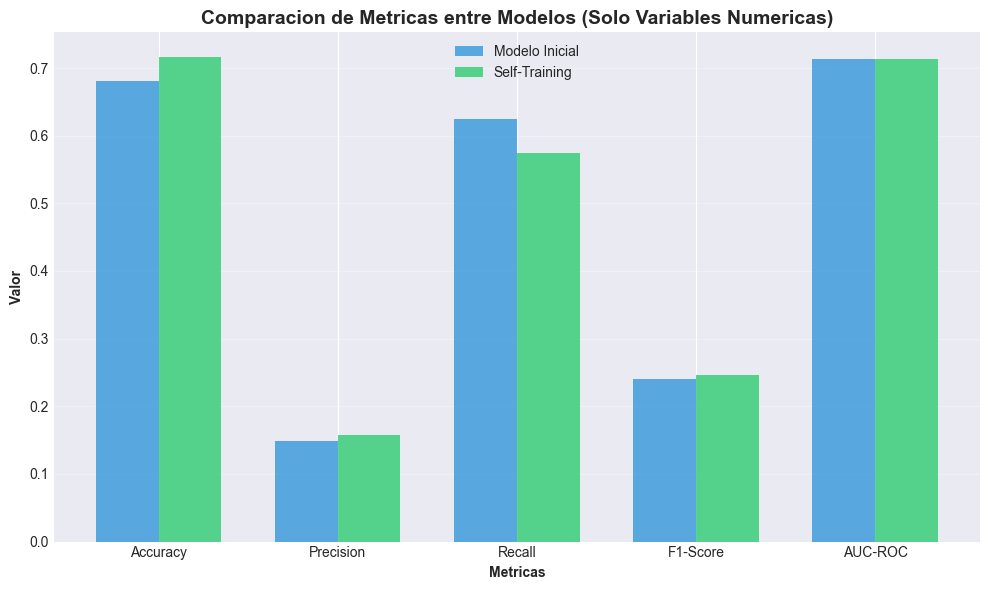

In [74]:
# 2. GRAFICO DE BARRAS - COMPARACION DE METRICAS
fig, ax = plt.subplots(figsize=(10, 6))

metricas = tabla_resultados['Metrica']
x = range(len(metricas))
ancho = 0.35

ax.bar([i - ancho/2 for i in x], tabla_resultados['Modelo Inicial'], 
       ancho, label='Modelo Inicial', color='#3498db', alpha=0.8)
ax.bar([i + ancho/2 for i in x], tabla_resultados['Self-Training'], 
       ancho, label='Self-Training', color='#2ecc71', alpha=0.8)

ax.set_xlabel('Metricas', fontweight='bold')
ax.set_ylabel('Valor', fontweight='bold')
ax.set_title('Comparacion de Metricas entre Modelos (Solo Variables Numericas)', 
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

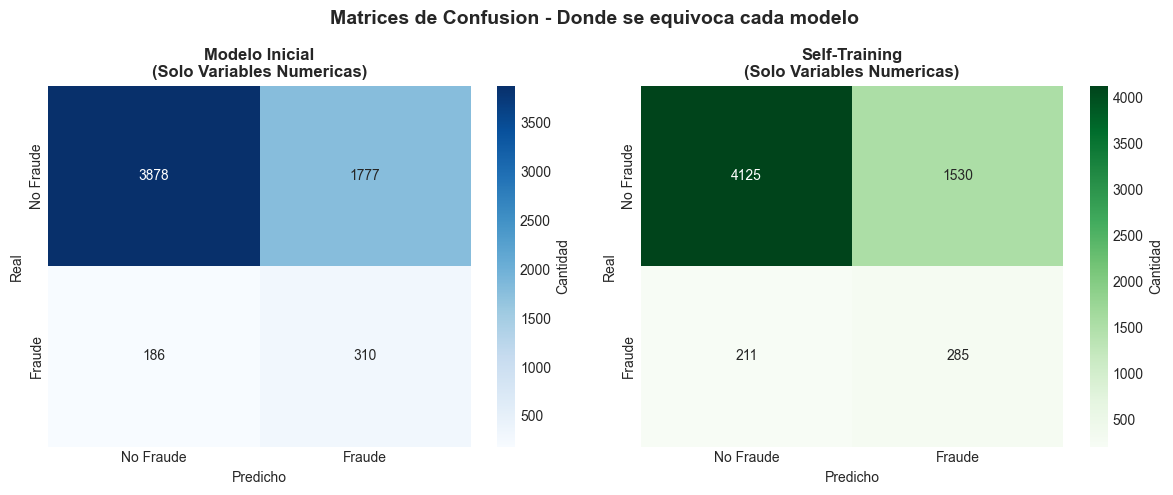

In [75]:
# 3. MATRIZ DE CONFUSION - VER DONDE ESTAN LOS ERRORES
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Modelo Inicial
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            cbar_kws={'label': 'Cantidad'})
axes[0].set_title('Modelo Inicial\n(Solo Variables Numericas)', fontweight='bold')
axes[0].set_ylabel('Real')
axes[0].set_xlabel('Predicho')
axes[0].set_xticklabels(['No Fraude', 'Fraude'])
axes[0].set_yticklabels(['No Fraude', 'Fraude'])

# Self-Training
cm_st = confusion_matrix(y_test, y_pred_st)
sns.heatmap(cm_st, annot=True, fmt='d', cmap='Greens', ax=axes[1], 
            cbar_kws={'label': 'Cantidad'})
axes[1].set_title('Self-Training\n(Solo Variables Numericas)', fontweight='bold')
axes[1].set_ylabel('Real')
axes[1].set_xlabel('Predicho')
axes[1].set_xticklabels(['No Fraude', 'Fraude'])
axes[1].set_yticklabels(['No Fraude', 'Fraude'])

plt.suptitle('Matrices de Confusion - Donde se equivoca cada modelo', 
             fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [76]:
# 4. DETECCION DE FRAUDES - TABLA DETALLADA
tabla_fraudes = pd.DataFrame({
    'Categoria': [
        'Fraudes detectados correctamente',
        'Fraudes NO detectados (error)',
        'Falsas alarmas (error)',
        'No fraude correcto'
    ],
    'Modelo Inicial': [
        cm_base[1,1],  # Verdaderos positivos
        cm_base[1,0],  # Falsos negativos
        cm_base[0,1],  # Falsos positivos
        cm_base[0,0]   # Verdaderos negativos
    ],
    'Self-Training': [
        cm_st[1,1],
        cm_st[1,0],
        cm_st[0,1],
        cm_st[0,0]
    ]
})

print("ANALISIS DE DETECCION DE FRAUDES (SOLO VARIABLES NUMERICAS)")
print("=" * 80)
print(tabla_fraudes.to_string(index=False))
print(f"\nTotal de fraudes reales en prueba: {cm_base[1,0] + cm_base[1,1]}")
print(f"Tasa de deteccion Modelo Inicial: {cm_base[1,1]/(cm_base[1,0] + cm_base[1,1])*100:.1f}%")
print(f"Tasa de deteccion Self-Training: {cm_st[1,1]/(cm_st[1,0] + cm_st[1,1])*100:.1f}%")
print(f"\nCARACTERISTICAS DEL EXPERIMENTO:")
print(f"- Variables utilizadas: {X_train_scaled.shape[1]} (SOLO NUMERICAS)")
print(f"- Variables categoricas: EXCLUIDAS")
print(f"- Pseudo-etiquetas agregadas: {total_agregados}")
print(f"- Umbral de confianza: {threshold}")

ANALISIS DE DETECCION DE FRAUDES (SOLO VARIABLES NUMERICAS)
                       Categoria  Modelo Inicial  Self-Training
Fraudes detectados correctamente             310            285
   Fraudes NO detectados (error)             186            211
          Falsas alarmas (error)            1777           1530
              No fraude correcto            3878           4125

Total de fraudes reales en prueba: 496
Tasa de deteccion Modelo Inicial: 62.5%
Tasa de deteccion Self-Training: 57.5%

CARACTERISTICAS DEL EXPERIMENTO:
- Variables utilizadas: 105 (SOLO NUMERICAS)
- Variables categoricas: EXCLUIDAS
- Pseudo-etiquetas agregadas: 259261
- Umbral de confianza: 0.7


### 7. Metricas Adicionales

In [77]:
# Metricas adicionales
from sklearn.metrics import roc_curve, auc, classification_report

print(f"AUC: {auc_base:.4f} -> {auc_st:.4f} (mejora: {auc_st - auc_base:+.4f})")

print("\nReporte detallado:")
print(classification_report(y_test, y_pred_st, target_names=['No Fraude', 'Fraude']))

AUC: 0.7133 -> 0.7128 (mejora: -0.0005)

Reporte detallado:
              precision    recall  f1-score   support

   No Fraude       0.95      0.73      0.83      5655
      Fraude       0.16      0.57      0.25       496

    accuracy                           0.72      6151
   macro avg       0.55      0.65      0.54      6151
weighted avg       0.89      0.72      0.78      6151



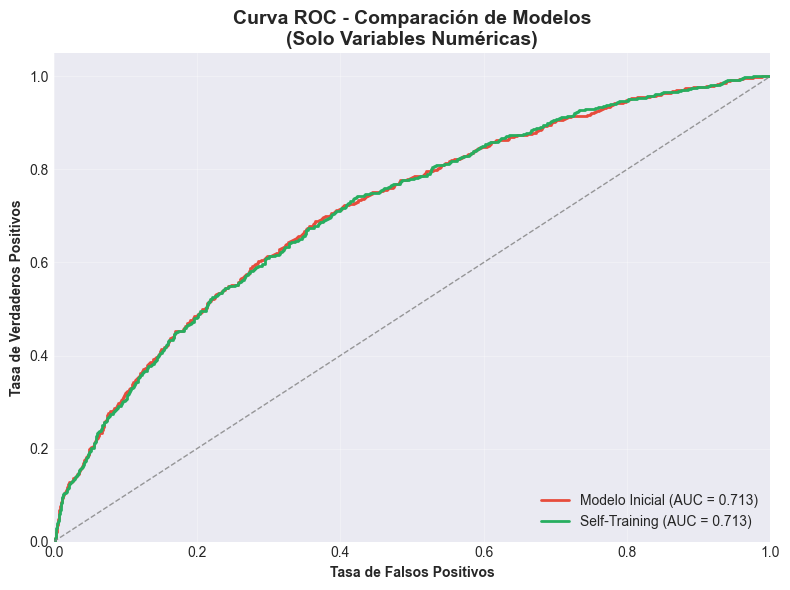

In [78]:
# 6. CURVA ROC COMPARATIVA
fig, ax = plt.subplots(figsize=(8, 6))

# Curva ROC Modelo Base
y_prob_base = modelo_base.predict_proba(X_test_scaled)[:, 1]
fpr_base, tpr_base, _ = roc_curve(y_test, y_prob_base)
roc_auc_base = auc(fpr_base, tpr_base)

# Curva ROC Self-Training
y_prob_st = M_final.predict_proba(X_test_scaled)[:, 1]
fpr_st, tpr_st, _ = roc_curve(y_test, y_prob_st)
roc_auc_st = auc(fpr_st, tpr_st)

# Plotear curvas
ax.plot(fpr_base, tpr_base, color='#e74c3c', lw=2, 
        label=f'Modelo Inicial (AUC = {roc_auc_base:.3f})')
ax.plot(fpr_st, tpr_st, color='#27ae60', lw=2, 
        label=f'Self-Training (AUC = {roc_auc_st:.3f})')
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.8)

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Tasa de Falsos Positivos', fontweight='bold')
ax.set_ylabel('Tasa de Verdaderos Positivos', fontweight='bold')
ax.set_title('Curva ROC - Comparación de Modelos\n(Solo Variables Numéricas)', 
             fontweight='bold', fontsize=14)
ax.legend(loc="lower right")
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [79]:
# 7. TABLA COMPARATIVA DE METRICAS
resultados = pd.DataFrame({
    'Modelo': ['Modelo Inicial', 'Self-Training'],
    'Features': [X_train_scaled.shape[1], X_train_scaled.shape[1]],
    'ROC-AUC': [auc_base, auc_st],
    'Precision': [precision_base, precision_st],
    'Recall': [recall_base, recall_st],
    'F1-Score': [f1_base, f1_st]
})

print("\nComparación de Modelos:")
print(resultados.round(6).to_string(index=False))


Comparación de Modelos:
        Modelo  Features  ROC-AUC  Precision   Recall  F1-Score
Modelo Inicial       105 0.713327   0.148539 0.625000  0.240031
 Self-Training       105 0.712844   0.157025 0.574597  0.246646
